In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from numba import jit, njit, prange
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
from scipy.optimize import minimize

In [2]:
DIR = Sim_res / 'Geo_Rand_Walk_2D' / 'v2_p_atmos'
if DIR.exists():
    print(*list(DIR.glob('*.txt')), sep='\n')

C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_100.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_1000.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_10000.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_150.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_200.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_3000.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_350.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Drunk_Sailor_N_500.txt
C:\Users\Admin\Documents\Github\MagnetCode\Simulation Results\Geo_Rand_Walk_2D\v2_p_atmos\Dr

In [3]:
files = list(DIR.glob('*0.txt'))
df = np.array([np.loadtxt(files[0], skiprows=1)])
for f in files[1:]:
    df_0 = np.loadtxt(f, skiprows=1)
    df = np.append(df, [df_0], axis=0)
df = df[np.argsort(df[:,0])]

f = open(files[1], 'r')
for line in f:
    s = line.split()
    break
    
data = pd.DataFrame(df, columns=s)
data['N'] = data['N'].apply(lambda x: int(x))
data['steps'] = data['steps'].apply(lambda x: int(x)) 
data

,N,n1_mean,n2_mean,n3_mean,n4_mean,uni_mean,n1_std,n2_std,n3_std,n4_std,uni_std,p0,p1,p2,p3,steps
0,100,0.067676,0.335163,0.357310,0.239851,0.490868,0.033153,0.087256,0.066923,0.092094,0.082473,0.182831,0.246855,0.290593,0.279720,96430000
1,150,0.057825,0.307874,0.356280,0.278021,0.462622,0.026299,0.076904,0.059072,0.091072,0.074609,0.212044,0.250342,0.277737,0.259877,69360000
2,200,0.052236,0.290436,0.353706,0.303622,0.444360,0.022429,0.070394,0.054511,0.089504,0.069589,0.231971,0.251413,0.269204,0.247413,36140000
3,350,0.043761,0.260708,0.345895,0.349636,0.412508,0.016684,0.059558,0.047437,0.085118,0.061001,0.268341,0.251656,0.253724,0.226279,17070000
4,500,0.039590,0.244237,0.339654,0.376519,0.394394,0.013959,0.053668,0.043809,0.081699,0.056254,0.290471,0.250914,0.244515,0.214100,7720000
5,750,0.035672,0.227586,0.331875,0.404867,0.375589,0.011506,0.047830,0.040327,0.077527,0.051436,0.313906,0.249196,0.234730,0.202167,4810000
6,1000,0.033333,0.216963,0.326096,0.423608,0.363247,0.010109,0.044158,0.038185,0.074502,0.048411,0.329962,0.247547,0.228218,0.194273,2480000
7,3000,0.026597,0.183363,0.303506,0.486534,0.322651,0.006449,0.032976,0.031578,0.062995,0.038761,0.385626,0.239993,0.205155,0.169226,420000
8,5000,0.024335,0.170867,0.293222,0.511576,0.306788,0.005359,0.029017,0.029140,0.057992,0.035158,0.409736,0.235407,0.195493,0.159364,140000
9,6500,0.023299,0.165178,0.288158,0.523364,0.299215,0.004906,0.027240,0.028027,0.055635,0.033523,0.420400,0.232740,0.191620,0.155240,100000


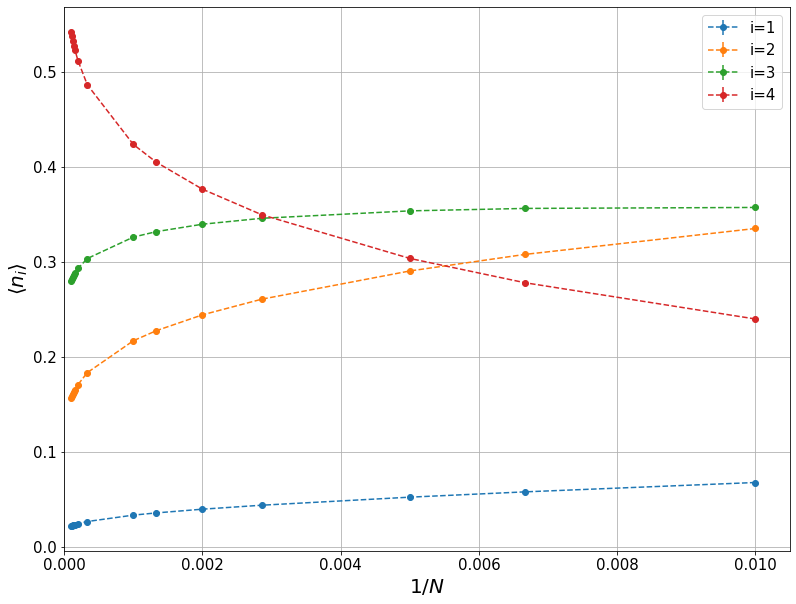

In [9]:
plt.figure(figsize=(13,10))
data['1/N'] = 1/(data['N'])
x = data['1/N'] 
y_names = ['n1_mean','n2_mean','n3_mean','n4_mean']
dy_names = ['n1_std','n2_std','n3_std','n4_std']
for i in range(4):
    y = data[y_names[i]]
    dy = data[dy_names[i]] / np.sqrt(data['steps'])
    plt.errorbar(x, y, dy, fmt='o--', label=f'i={i+1}')
    plt.ylabel(r'$\langle n_{i} \rangle$', fontsize=20)
    plt.xlim(0.)
plt.xlabel(r'$1/N$', fontsize=20);
plt.grid()
plt.legend(fontsize=15)
plt.tick_params(labelsize=15)

#plt.savefig(Path.cwd() / 'Images' / 'Rand_Path_n_i.png')

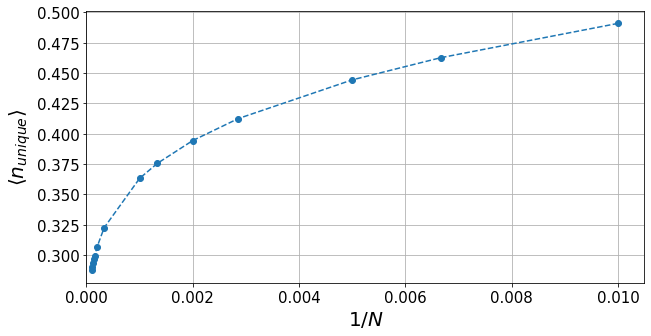

In [7]:
plt.figure(figsize=(10,5))
data['1/N'] = 1/(data['N'])
x = data['1/N'] 
y_names = ['uni_mean']
dy_names = ['uni_std']
for i in range(1):
    y = data[y_names[i]]
    dy = data[dy_names[i]] / np.sqrt(data['steps'])
    plt.errorbar(x, y, dy, fmt='o--', label=f'i={i}')
    plt.ylabel(r'$\langle n_{unique} \rangle$', fontsize=20)
    plt.xlim(0.)
plt.xlabel(r'$1/N$', fontsize=20);
plt.grid()
plt.tick_params(labelsize=15)

#plt.savefig(Path.cwd() / 'Images' / 'Rand_Path_n_unique.png')

In [9]:
data_bN = pd.read_csv('rw_bulk_N.csv', index_col=0)
data_bNu = pd.read_csv('rw_bulk_Nunique.csv', index_col=0)
data_pN = pd.read_csv('rw_p_N.csv', index_col=0)
data_pNu = pd.read_csv('rw_p_Nunique.csv', index_col=0)

In [10]:
data_bN

,k,a,b,d_k,d_a,d_b,N_min,N_max
n1,0.342510,0.416707,0.014445,0.000816,0.001585,0.000144,3000.0,10000.0
n2,0.572697,0.170857,0.037394,0.004116,0.001095,0.002126,3000.0,10000.0
n3,0.587875,0.218865,0.201834,0.003017,0.003484,0.003088,3000.0,10000.0
n4,-1.239466,0.189293,0.758816,0.009563,0.003260,0.004921,500.0,10000.0
n_unique,0.831172,0.204894,0.161567,0.001112,0.000195,0.000432,500.0,10000.0


In [11]:
data_bNu

,k,a,b,d_k,d_a,d_b,N_min,N_max
n1,0.312899,0.479118,0.014961,0.001383,0.002225,0.000170,967.0,2875.0
n2,0.567402,0.213836,0.052791,0.003168,0.001114,0.001556,967.0,2875.0
n3,0.542193,0.244072,0.202502,0.005275,0.002297,0.002336,967.0,2875.0
n4,-1.200370,0.225437,0.741332,0.011843,0.004707,0.005629,197.0,2875.0


In [14]:
data_pN

,k,a,b,d_k,d_a,d_b,N_min,N_max
$p^{(0)}$,-1.172883,0.203473,0.616048,0.011220,0.007094,0.014073,3000.0,10000.0
$p^{(1)}$,0.539195,0.373621,0.212958,0.010730,0.032787,0.006282,3000.0,10000.0
$p^{(2)}$,0.595897,0.271845,0.137237,0.004384,0.006197,0.003529,1000.0,10000.0
$p^{(3)}$,0.613462,0.259167,0.091916,0.005285,0.005380,0.003748,750.0,10000.0


In [15]:
data_pNu

,k,a,b,d_k,d_a,d_b,N_min,N_max
$p^{(0)}$,-1.142980,0.251038,0.590519,0.009912,0.013999,0.019192,1533.0,2875.0
$p^{(1)}$,0.523587,0.437299,0.214146,0.014221,0.037107,0.005916,967.0,2875.0
$p^{(2)}$,0.584989,0.323486,0.141508,0.004864,0.007088,0.003251,363.0,2875.0
$p^{(3)}$,0.604267,0.310215,0.097261,0.005438,0.006058,0.003414,281.0,2875.0


In [54]:
def f_N(N, c):
    return c[0] * (1/N) ** c[1] + c[2]

def f_Nu_approx(N, cn, cU):
    k_i, a_i, b_i = cn
    k_u, a_u, b_u = cU
    return k_i / (b_u ** a_i) * (1/N) ** a_i - k_i * a_i * k_u / (b_u ** (a_i + 1)) * (1/N) ** (a_u + a_i) + b_i

def f_Nu(N, cn, cU):
    return cn[0] * (1/(N * f_N(N, cU))) ** cn[1] + cn[2]

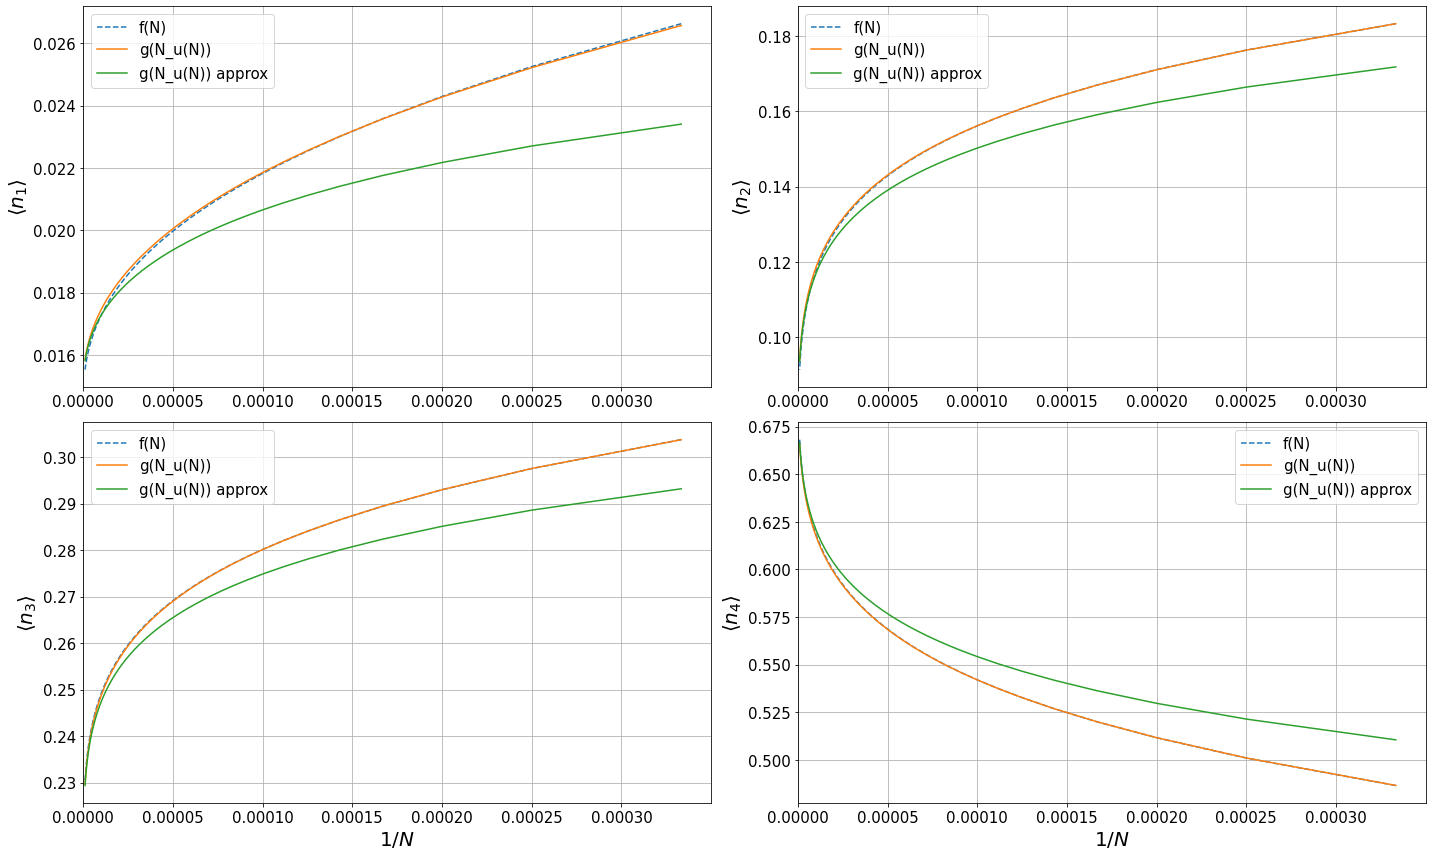

In [87]:
N = np.linspace(3000, 1e6, 1000)
x = 1/N
y_names = ['n1', 'n2', 'n3', 'n4']
log = False
fig, ax = plt.subplots(2,2,figsize=(20,12))
ax = ax.flatten()
for i in range(4):
    ax0 = ax[i]
    c = data_bN.loc[y_names[i], ['k', 'a', 'b']].values
    y = f_N(N, c)
    ax0.plot(x, y, '--', label='f(N)')
    
    cn = data_bNu.loc[y_names[i], ['k', 'a', 'b']].values
    cu = data_bN.loc['n_unique', ['k', 'a', 'b']].values
    y = f_Nu(N, cn, cu)
    ax0.plot(x, y, '-', label='g(N_u(N))')
    
    
    y = f_Nu_approx(N, cn, cu)
    ax0.plot(x, y, '-', label='g(N_u(N)) approx')
    
    
    ax0.set_ylabel(rf'$\langle n_{i+1} \rangle$', fontsize=20)
    if i >= 2:
        ax0.set_xlabel(r'$1/N$', fontsize=20);
    ax0.grid()
    ax0.legend(fontsize=15)
    ax0.tick_params(labelsize=15)
    if log:
        ax0.set_xscale('log')
        ax0.set_yscale('log')
    else:
        ax0.set_xlim(0.)
    #plt.show()
plt.tight_layout()
plt.savefig(Path.cwd() / 'Images' / 'n_i_fN_vs_gNun.png')

In [24]:
data_bN.loc['n1', ['k','a','b']].values

array([0.34250977, 0.41670675, 0.01444549])

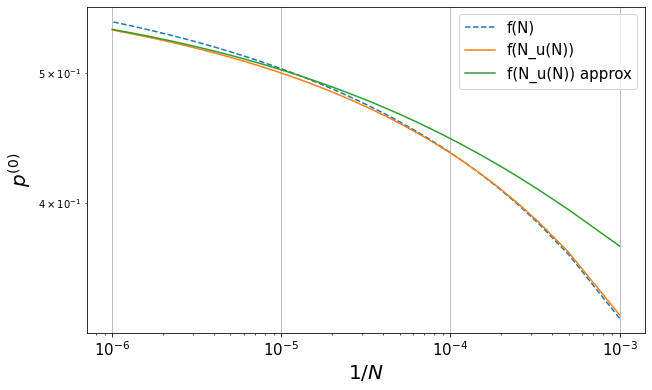

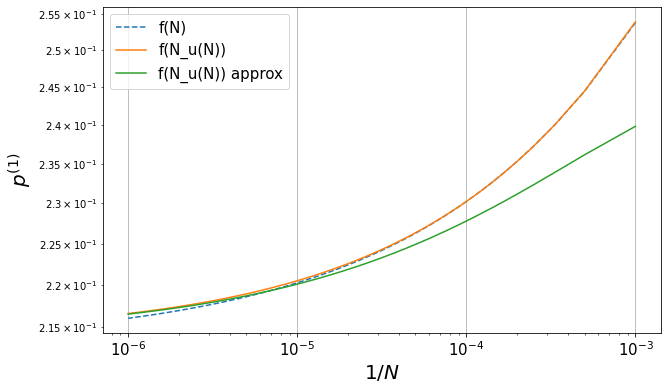

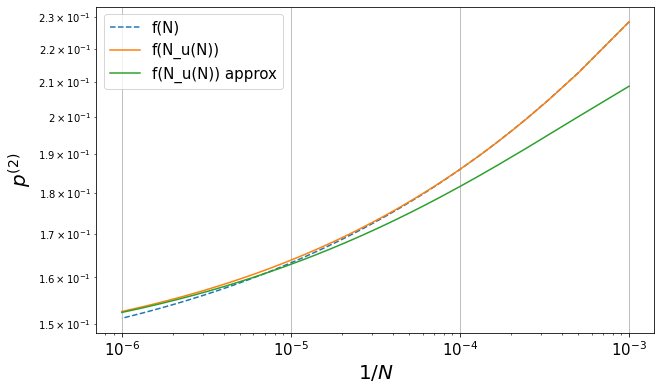

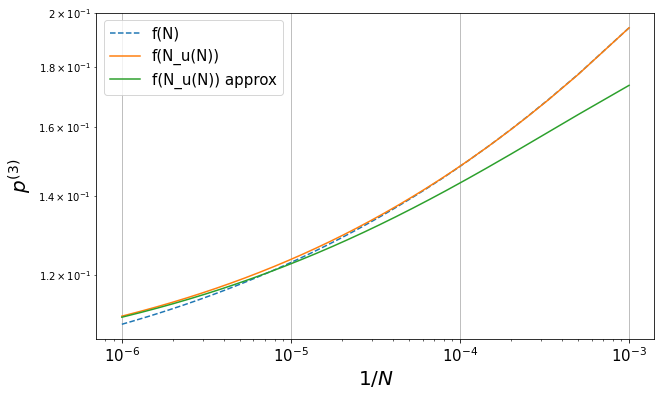

In [71]:
N = np.linspace(1000, 1e6, 1000)
x = 1/N
y_names = data_pN.index
log=True
for i in range(4):
    plt.figure(figsize=(10,6))
    c = data_pN.loc[y_names[i], ['k', 'a', 'b']].values
    y = f_N(N, c)
    plt.plot(x, y, '--', label='f(N)')
    
    cn = data_pNu.loc[y_names[i], ['k', 'a', 'b']].values
    cu = data_bN.loc['n_unique', ['k', 'a', 'b']].values
    y = f_Nu(N, cn, cu)
    plt.plot(x, y, '-', label='f(N_u(N))')
    
    
    y = f_Nu_approx(N, cn, cu)
    plt.plot(x, y, '-', label='f(N_u(N)) approx')
    
    plt.ylabel(y_names[i], fontsize=20)
    plt.xlabel(r'$1/N$', fontsize=20);
    plt.grid()
    if log:
        plt.xscale('log')
        plt.yscale('log')
    else:
        plt.xlim(0.)
    
    plt.legend(fontsize=15)
    plt.tick_params(labelsize=15)
    plt.show()